In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms
from sklearn import preprocessing
import sklearn.decomposition as skde
import sklearn.metrics as sklm
import sklearn.datasets as skds
import graphviz 
from sklearn import tree

%matplotlib inline

Loads the dataset.

In [2]:
bikesData = pd.read_csv('BikesProcessed.csv')
Labels = bikesData['BikeBuyer']
bikesData.drop(bikesData.columns[0], axis=1, inplace=True)
bikesData.drop(['BikeBuyer'], axis=1, inplace=True)
Features = np.array(bikesData)
print(Features.shape)
bikesData.head()

(16404, 12)


,HomeOwnerFlag,AreaCode,Sex,Married,JobType,EducationType,Country,Income,ChildrenAtHomeFlag,AgeBracket,ChildrenFlag,OnePlusCarsFlag
0,1,500,1,1,0,0,1,3,0,1,1,0
1,0,500,1,0,0,0,1,3,1,1,1,0
2,1,500,1,1,0,0,1,2,1,1,1,0
3,0,500,0,0,0,0,1,2,0,1,0,0
4,1,500,0,0,0,0,1,2,1,1,1,1


Trains the dataset.
Code below based on:
https://www.edx.org/course/principles-of-machine-learning-python-edition

In [3]:
# Randomly sample cases to create independent training and test data

nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])


Scales the dataset
Code below based on:
https://www.edx.org/course/principles-of-machine-learning-python-edition

In [4]:
#Rescale numeric features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
X_train[:5,:]

/Users/grahamcooper/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(11404, 12)


/Users/grahamcooper/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/grahamcooper/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.6924607 ,  0.97454348, -1.0056279 , -1.07317199, -0.4111595 ,
         1.15310266, -0.88440593,  0.40793234, -0.80304843, -1.37581013,
         0.59652623, -1.01235268],
       [-1.44412528, -1.02612148, -1.0056279 ,  0.93181709,  1.73706727,
         0.38696524,  0.29136526, -1.2902098 ,  1.24525492, -0.13815621,
         0.59652623, -1.01235268],
       [-1.44412528,  0.97454348, -1.0056279 , -1.07317199, -0.4111595 ,
        -1.14530961, -0.88440593,  0.40793234,  1.24525492, -0.13815621,
         0.59652623, -1.01235268],
       [ 0.6924607 ,  0.97454348, -1.0056279 ,  0.93181709, -0.4111595 ,
        -0.37917219, -0.88440593,  0.40793234,  1.24525492, -0.13815621,
         0.59652623,  0.98779804],
       [ 0.6924607 , -1.02612148,  0.99440359,  0.93181709, -1.12723509,
         0.38696524,  0.29136526,  1.2570034 ,  1.24525492,  1.09949771,
         0.59652623,  0.98779804]])

In [5]:
#X_train, X_test, y_train, y_test = ms.train_test_split(
#    bikeStats, bikeBuyer, stratify=bikeBuyer, random_state=42)
print("Depth\t Training Set %\t Test Set %")
for i in range(1,21):
    tree_mod = DecisionTreeClassifier(max_depth = i, random_state=0)
    tree_mod.fit(X_train, y_train)
    print(i, "\t %f" % tree_mod.score(X_train, y_train), "\t %f" % tree_mod.score(X_test, y_test))
    #print("max depth of tree:", i)
    #print("accuracy on training set: %f" % tree.score(X_train, y_train))
    #print("accuracy on test set: %f" % tree.score(X_test, y_test))
    #print("\n")

Depth	 Training Set %	 Test Set %
1 	 0.699491 	 0.708800
2 	 0.731498 	 0.732400
3 	 0.752368 	 0.755600
4 	 0.761575 	 0.769800
5 	 0.769993 	 0.773600
6 	 0.786128 	 0.780200
7 	 0.794283 	 0.778600
8 	 0.802350 	 0.775800
9 	 0.810505 	 0.783400
10 	 0.818485 	 0.771000
11 	 0.826640 	 0.773000
12 	 0.834619 	 0.764800
13 	 0.839179 	 0.764400
14 	 0.842687 	 0.762000
15 	 0.843301 	 0.763200
16 	 0.843476 	 0.762200
17 	 0.843564 	 0.762800
18 	 0.843564 	 0.763000
19 	 0.843564 	 0.762600
20 	 0.843564 	 0.762600


Finds the most important features
Code based on:
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [6]:
# Build a tree and compute the feature importances
tree_mod = DecisionTreeClassifier(random_state=0)

tree_mod.fit(X_train, y_train)
importances = tree_mod.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, bikesData.columns[int(indices[f])], importances[indices[f]]))

print('\n')
print("accuracy on training set: %f" % tree_mod.score(X_train, y_train))
print("accuracy on test set: %f" % tree_mod.score(X_test, y_test))

Feature ranking:
1. feature ChildrenAtHomeFlag (0.236628)
2. feature Income (0.142783)
3. feature AgeBracket (0.106862)
4. feature Married (0.104381)
5. feature Country (0.081767)
6. feature Sex (0.080561)
7. feature EducationType (0.064415)
8. feature JobType (0.060258)
9. feature OnePlusCarsFlag (0.045290)
10. feature HomeOwnerFlag (0.044342)
11. feature ChildrenFlag (0.017269)
12. feature AreaCode (0.015444)


accuracy on training set: 0.843564
accuracy on test set: 0.762600


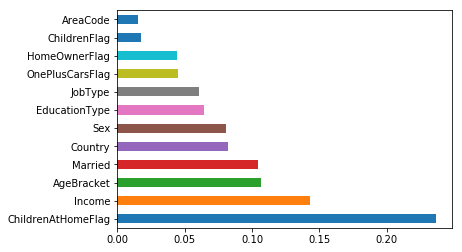

In [7]:
(pd.Series(tree_mod.feature_importances_, index=bikesData.columns)
   .nlargest(12)
   .plot(kind='barh')) 

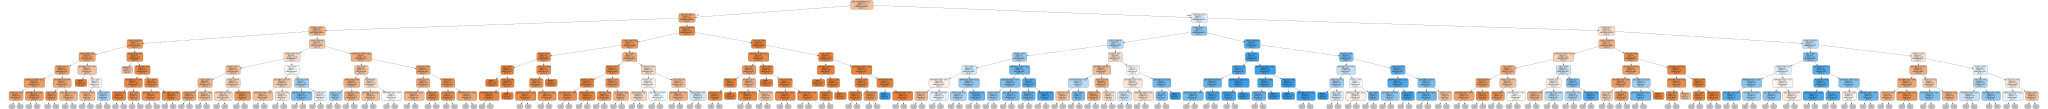

In [8]:
dot_data = tree.export_graphviz(tree_mod, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris") 
dot_data = tree.export_graphviz(tree_mod, out_file=None, 
                                feature_names=list(bikesData),  
                                class_names=list(["0", "1"]),  
                                filled=True, rounded=True,  
                                special_characters=True,
                               max_depth = 7)  
graph = graphviz.Source(dot_data)  
graph 

PCA
Code below based on:
https://www.edx.org/course/principles-of-machine-learning-python-edition

In [9]:
pca_mod = skde.PCA()
pca_comps = pca_mod.fit(X_train)
pca_comps

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
print(pca_comps.explained_variance_ratio_)
print(np.sum(pca_comps.explained_variance_ratio_))

[0.21377172 0.14649453 0.10220906 0.09545838 0.08700828 0.07751092
 0.06607225 0.06110195 0.05244718 0.04858582 0.02827074 0.02106918]
0.9999999999999999


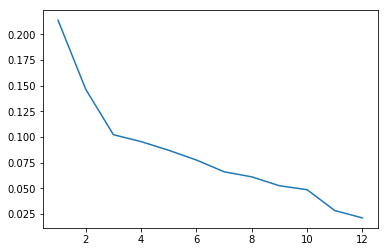

In [11]:
def plot_explained(mod):
    comps = mod.explained_variance_ratio_
    x = range(len(comps))
    x = [y + 1 for y in x]          
    plt.plot(x,comps)

plot_explained(pca_comps)

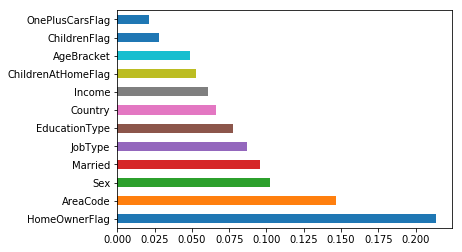

In [12]:
(pd.Series(pca_comps.explained_variance_ratio_, index=bikesData.columns)
   .nlargest(12)
   .plot(kind='barh')) 

Nested cross validation
Code below based on:
https://www.edx.org/course/principles-of-machine-learning-python-edition

In [13]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

In [14]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"max_features": [1, 2, 3, 4, 5, 6, 7 ,8 , 9, 10, 11, 12], "max_depth":[1, 2, 3, 4, 5, 6, 7, 8, 9]}
## Define the random forest model
nr.seed(3456)
rf_clf = DecisionTreeClassifier()

## Perform the grid search over the parameters
nr.seed(4455)
rf_clf = ms.GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
rf_clf.fit(Features, Labels)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.max_depth)

12
7


In [15]:
nr.seed(498)
cv_estimate = ms.cross_val_score(rf_clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.842
SDT of the metric       = 0.009
Outcomes by cv fold
Fold  1    0.850
Fold  2    0.842
Fold  3    0.839
Fold  4    0.844
Fold  5    0.839
Fold  6    0.844
Fold  7    0.835
Fold  8    0.822
Fold  9    0.860
Fold 10    0.846


In [16]:
# Randomly sample cases to create independent training and test data

nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [17]:
nr.seed(1115)
rf_mod = DecisionTreeClassifier(max_features = rf_clf.best_estimator_.max_features, 
                                max_depth = rf_clf.best_estimator_.max_depth) 
rf_mod.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2900               431
Actual negative       676               993

Accuracy        0.778600
AUC             0.84
Macro precision 0.75
Macro recall    0.73
 
           Positive      Negative
Num case     3331          1669
Precision    0.81          0.70
Recall       0.87          0.59
F1           0.84          0.64


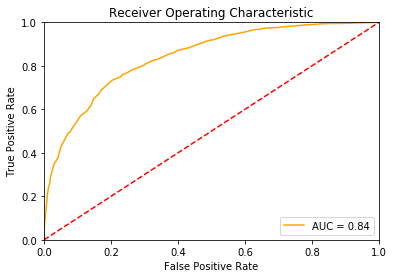

In [18]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.6f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

probabilities = rf_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)
plot_auc(y_test, probabilities)     

Get the most important features

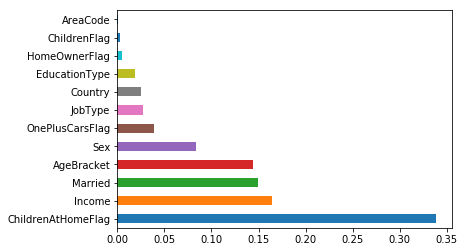

In [19]:
(pd.Series(rf_mod.feature_importances_, index=bikesData.columns)
   .nlargest(rf_clf.best_estimator_.max_features)
   .plot(kind='barh')) 

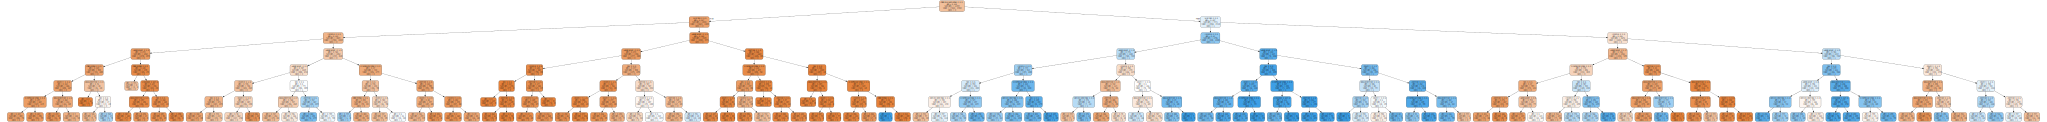

In [20]:
dot_data = tree.export_graphviz(rf_mod, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris") 
dot_data = tree.export_graphviz(rf_mod, out_file=None, 
                                feature_names=list(bikesData),  
                                class_names=list(["0", "1"]),  
                                filled=True, rounded=True,  
                                special_characters=True,
                               max_depth = rf_clf.best_estimator_.max_depth)  
graph = graphviz.Source(dot_data)  
graph 

Tests with the 5 best features

In [21]:
bikesData.head()

,HomeOwnerFlag,AreaCode,Sex,Married,JobType,EducationType,Country,Income,ChildrenAtHomeFlag,AgeBracket,ChildrenFlag,OnePlusCarsFlag
0,1,500,1,1,0,0,1,3,0,1,1,0
1,0,500,1,0,0,0,1,3,1,1,1,0
2,1,500,1,1,0,0,1,2,1,1,1,0
3,0,500,0,0,0,0,1,2,0,1,0,0
4,1,500,0,0,0,0,1,2,1,1,1,1


In [22]:
bikesData.drop(['AreaCode', 'JobType', 'EducationType', 'Country', 'ChildrenFlag', 'HomeOwnerFlag', 'OnePlusCarsFlag'], axis=1, inplace=True)
Features = np.array(bikesData)
print(Features.shape)
bikesData.head()

(16404, 5)


,Sex,Married,Income,ChildrenAtHomeFlag,AgeBracket
0,1,1,3,0,1
1,1,0,3,1,1
2,1,1,2,1,1
3,0,0,2,0,1
4,0,0,2,1,1


In [23]:
# Randomly sample cases to create independent training and test data

nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [24]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"max_features": [1, 2, 3, 4, 5], "max_depth":[1, 2, 3, 4, 5, 6, 7, 8, 9]}
## Define the random forest model
nr.seed(3456)
rf_clf = DecisionTreeClassifier()

## Perform the grid search over the parameters
nr.seed(4455)
rf_clf = ms.GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
rf_clf.fit(Features, Labels)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.max_depth)

5
7


In [25]:
nr.seed(498)
cv_estimate = ms.cross_val_score(rf_clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.839
SDT of the metric       = 0.011
Outcomes by cv fold
Fold  1    0.852
Fold  2    0.839
Fold  3    0.835
Fold  4    0.844
Fold  5    0.829
Fold  6    0.837
Fold  7    0.836
Fold  8    0.818
Fold  9    0.858
Fold 10    0.839


In [26]:
nr.seed(1115)
rf_mod = DecisionTreeClassifier(max_features = rf_clf.best_estimator_.max_features, 
                                max_depth = rf_clf.best_estimator_.max_depth) 
rf_mod.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

                 Confusion matrix
                 Score positive    Score negative
Actual positive      3005               326
Actual negative       778               891

Accuracy        0.779200
AUC             0.84
Macro precision 0.76
Macro recall    0.72
 
           Positive      Negative
Num case     3331          1669
Precision    0.79          0.73
Recall       0.90          0.53
F1           0.84          0.62


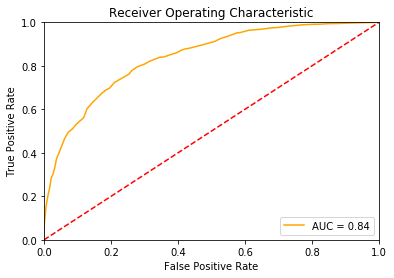

In [27]:
probabilities = rf_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)
plot_auc(y_test, probabilities)  

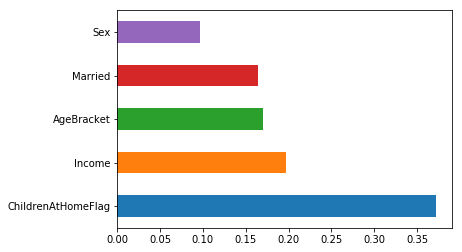

In [28]:
(pd.Series(rf_mod.feature_importances_, index=bikesData.columns)
   .nlargest(rf_clf.best_estimator_.max_features)
   .plot(kind='barh')) 

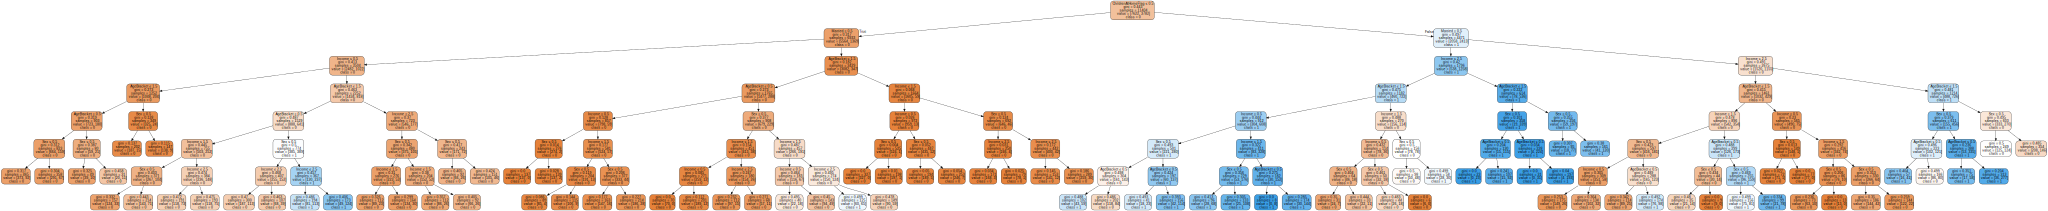

In [29]:
dot_data = tree.export_graphviz(rf_mod, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris") 
dot_data = tree.export_graphviz(rf_mod, out_file=None, 
                                feature_names=list(bikesData),  
                                class_names=list(["0", "1"]),  
                                filled=True, rounded=True,  
                                special_characters=True,
                               max_depth = rf_clf.best_estimator_.max_depth)  
graph = graphviz.Source(dot_data)  
graph 